<a href="https://colab.research.google.com/github/HrishiHarsora/ES114-Probability-Statistics-Data-Visualization-/blob/main/ES114_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
#Defining Required Functions
def covariance(dataset1,dataset2):

  #Means
  Mean1 = np.mean(dataset1)
  Mean2 = np.mean(dataset2)

  #Variance
  Var1 = st.variance(dataset1)
  Var2 = st.variance(dataset2)


  #Covariance
  SC = []
  for i in range(len(dataset1)):
    SC.append((dataset1[i]-Mean1)*(dataset2[i]-Mean2))

  Sample_Covariance = np.sum(SC)/(np.size(dataset1)-1)
  Sample_Covariance = np.round(Sample_Covariance,4)
  return Sample_Covariance

def standardization(dataset):
  mean = np.mean(dataset)
  variance = np.var(dataset)
  for i in range(len(dataset)):
    standardized_value = (dataset[i]-mean)/np.sqrt(variance)
    dataset[i]=standardized_value
  return(dataset)

In [ ]:
#Loading the Dataset
data = s.load_dataset(name = 'iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***Question 1 - Estimating the Covariance Matrix***

In [ ]:
#Creating an empty matrix which would later contain the eexpectations and hence make the Covariance Matrix

covariance_matrix = np.zeros((4,4))

#Segregrating datapoints pertaining to each attribute from the dataset and also standardizing
attribute1 = sl = standardization(list(data['sepal_length']))
attribute2 = sw = standardization(list(data['sepal_width']))
attribute3 = pl = standardization(list(data['petal_length']))
attribute4 = pw = standardization(list(data['petal_width']))

list_of_attributes = [attribute1,attribute2,attribute3,attribute4]

for i in range(len(list_of_attributes)):
  for j in range(len(list_of_attributes)):
    covariance_matrix[i][j]=(covariance(list_of_attributes[i] , list_of_attributes[j]))

print("The Covariance Matrix: ")
print()
print(covariance_matrix)
#As can be seen, the matrix is symmetric.

The Covariance Matrix: 

[[ 1.0067 -0.1184  0.8776  0.8234]
 [-0.1184  1.0067 -0.4313 -0.3686]
 [ 0.8776 -0.4313  1.0067  0.9693]
 [ 0.8234 -0.3686  0.9693  1.0067]]


***Question 2 - Estimating the 4 principal components of Data***

The Eigenvector pertaining to Eigenvalue 2.9380465975284413 is: 
[ 0.52106644 -0.2693612   0.58041075  0.5648519 ]

The Eigenvector pertaining to Eigenvalue 0.9201217096259471 is: 
[-0.37740689 -0.92329934 -0.02452896 -0.06693804]

The Eigenvector pertaining to Eigenvalue 0.14776466954260328 is: 
[-0.71955615  0.24436422  0.14209687  0.63429768]

The Eigenvector pertaining to Eigenvalue 0.020867023303005793 is: 
[ 0.26132881 -0.12348687 -0.80145503  0.52357242]



Text(0.5, 1.0, 'Contribution of each eigenvector')

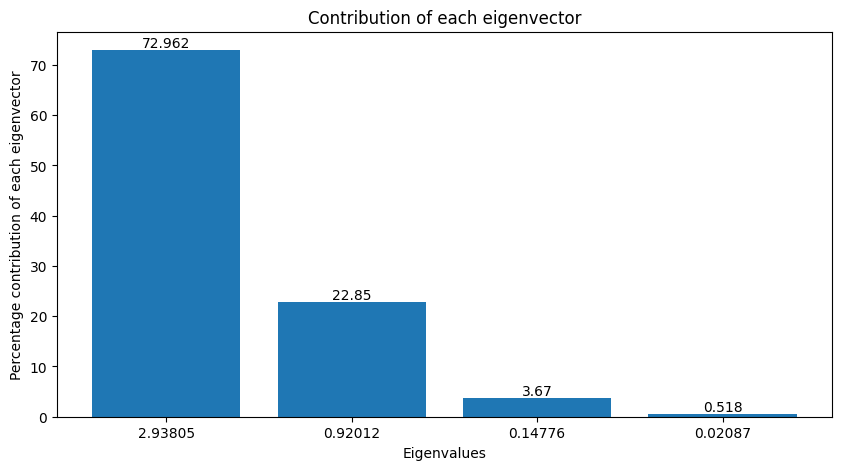

In [ ]:
#To get the Principal Components of the dataset, we must compute the eigenvalues and eigenvectors of the covariance matrix
#Then we can disregard the eigenvector with less eigenvalues and hence this would result in a reduction in Dimensionality

eigenvalues,eigenvectors = np.linalg.eig(covariance_matrix)

#The Eigenvalues and Eigenvectors
for i in range(len(eigenvalues)):
  print("The Eigenvector pertaining to Eigenvalue " + str(eigenvalues[i]) + " is: ")
  print(eigenvectors[:,i])
  print()

#The eigenvectors are the prinicpal components
#Visualizing the contribution of each of the 4 principal components

sum_of_eigenvalues = np.sum(eigenvalues)
contributions = []
for i in range(len(eigenvalues)):
  contributions.append((eigenvalues[i]/sum_of_eigenvalues)*100)

#Assigning axes
X= np.round(eigenvalues,5)
x = X.astype(str)
y = contributions

#plotting
fig= plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(x,y)
for i, value in enumerate(y):
    rounded_value = round(value, 3)
    plt.text(i, value + 0.5, str(rounded_value), ha='center')
ax.set_xlabel("Eigenvalues")
ax.set_ylabel("Percentage contribution of each eigenvector")
ax.set_title("Contribution of each eigenvector")


In [ ]:
#The 4 principal components
print("The Four Principal Components of the dataset corresponding to the 4 eigenvalues are: ")
for i in range(len(eigenvalues)):
  print(eigenvectors[:,i])
  print()

The Four Principal Components of the dataset corresponding to the 4 eigenvalues are: 
[ 0.52106644 -0.2693612   0.58041075  0.5648519 ]

[-0.37740689 -0.92329934 -0.02452896 -0.06693804]

[-0.71955615  0.24436422  0.14209687  0.63429768]

[ 0.26132881 -0.12348687 -0.80145503  0.52357242]



These are the 4 prinicpal components. However, after analyzing the contribution of each(on the basis of the eigenvalues), we can confidentally reduce the number of dimensions to 3(by dismissing the principal component pertaining to eigenvalue = 0.02383) and we can reduce the number of dimensions to 2(by dismissing the principal components pertaining to eigenvalue = 0.0782)

***Question 3 - Dimensionality Reduction***

In [ ]:
#Dimensionality Reduction to 3 Dimensions

#Getting feature vector
Eigenvector_Matrix = eigenvectors[:,:3]
print("The feature vector is: ")
print()
print(Eigenvector_Matrix)
print()
feature_vector = Eigenvector_Matrix

#Recasting data along prinipal axes
list_of_attributes = ['sepal_length','sepal_width','petal_length','petal_width']
sl = list(data['sepal_length'])
sw = list(data['sepal_width'])
pl = list(data['petal_length'])
pw = list(data['sepal_width'])
matrix_with_original_datapoints = np.array([sl,sw,pl,pw])
transposed_matrix_with_original_datapoints= np.transpose(matrix_with_original_datapoints)
print("The original matrix with the 150 datapoints casted in 4 dimension can be seen below: ")
print(np.shape(np.transpose(matrix_with_original_datapoints)))
print()

print("after applying Dimensionality Reduction....")
print()

#Matrix with the datapoints costed to 3 dimensions
matrix_with_datapoints_casted_to_3_dimensions = np.dot(transposed_matrix_with_original_datapoints,feature_vector)
print("The new matrix containing the datapoints casted into 3 dimensions can be seen from its shape: ")
print(np.shape(matrix_with_datapoints_casted_to_3_dimensions))

The feature vector is: 

[[ 0.52106644 -0.37740689 -0.71955615]
 [-0.2693612  -0.92329934  0.24436422]
 [ 0.58041075 -0.02452896  0.14209687]
 [ 0.5648519  -0.06693804  0.63429768]]

The original matrix with the 150 datapoints casted in 4 dimension can be seen below: 
(150, 4)

after applying Dimensionality Reduction....

The new matrix containing the datapoints casted into 3 dimensions can be seen from its shape: 
(150, 3)


In [ ]:
#Dimensionality Reduction to 2 Dimensions

#Getting feature vector
Eigenvector_Matrix = eigenvectors[:,:2]
print("The feature vector is: ")
print()
print(Eigenvector_Matrix)
print()
feature_vector = Eigenvector_Matrix

#Recasting data along prinipal axes
list_of_attributes = ['sepal_length','sepal_width','petal_length','petal_width']
sl = list(data['sepal_length'])
sw = list(data['sepal_width'])
pl = list(data['petal_length'])
pw = list(data['sepal_width'])
matrix_with_original_datapoints = np.array([sl,sw,pl,pw])
transposed_matrix_with_original_datapoints= np.transpose(matrix_with_original_datapoints)
print("The original matrix with the 150 datapoints casted in 4 dimension can be seen below: ")
print(np.shape(np.transpose(matrix_with_original_datapoints)))
print()

print("after applying Dimensionality Reduction....")
print()

#Matrix with the datapoints costed to 3 dimensions
matrix_with_datapoints_casted_to_2_dimensions = np.dot(transposed_matrix_with_original_datapoints,feature_vector)
print("The new matrix containing the datapoints casted into 3 dimensions can be seen from its shape: ")
print(np.shape(matrix_with_datapoints_casted_to_2_dimensions))

The feature vector is: 

[[ 0.52106644 -0.37740689]
 [-0.2693612  -0.92329934]
 [ 0.58041075 -0.02452896]
 [ 0.5648519  -0.06693804]]

The original matrix with the 150 datapoints casted in 4 dimension can be seen below: 
(150, 4)

after applying Dimensionality Reduction....

The new matrix containing the datapoints casted into 3 dimensions can be seen from its shape: 
(150, 2)


***Question 4 - Visualization***

In [ ]:
#A confirmation
print(set((data['species'])))
D = data['petal_length'].where(data['species']=='setosa')
D = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), D))
print(np.shape(D))

D = data['petal_length'].where(data['species']=='versicolor')
D = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), D))
print(np.shape(D))

D = data['petal_length'].where(data['species']=='virginica')
D = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), D))
print(np.shape(D))

#As can be seen out of the total 150 datapoints in case of each attribute, the three species each have 50 datapoints related to them only. This is same for all
#the other datasets that we have extracted from the original dataset because we aren't changing the number of datapoints for a particular attribute anyhere

{'versicolor', 'virginica', 'setosa'}
(50,)
(50,)
(50,)


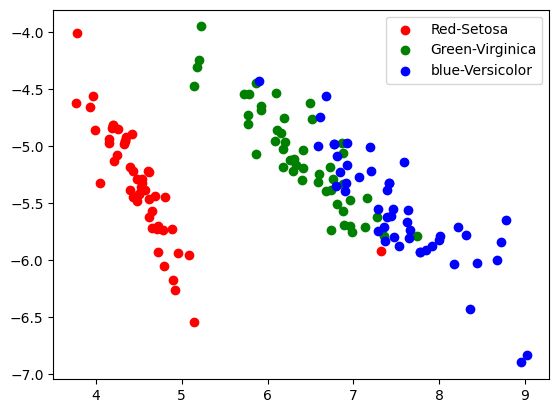

In [ ]:
#2D Visualiztion
main_datapoint_matrix = matrix_with_datapoints_casted_to_2_dimensions

#pertaining to setosa species
x1 = list(main_datapoint_matrix[:51,0])
y1= list(main_datapoint_matrix[:51,1])

#pertaining to Virginca species
x2 = list(main_datapoint_matrix[51:101,0])
y2= list(main_datapoint_matrix[51:101,1])

#pertaining to Versicolor species
x3 = list(main_datapoint_matrix[101:151,0])
y3 = list(main_datapoint_matrix[101:151,1])

plt.scatter(x1,y1,c = 'r')
plt.scatter(x2,y2,c = 'g')
plt.scatter(x3,y3,c = 'b')
plt.legend(['Red-Setosa', 'Green-Virginica', 'blue-Versicolor'],loc='upper right')

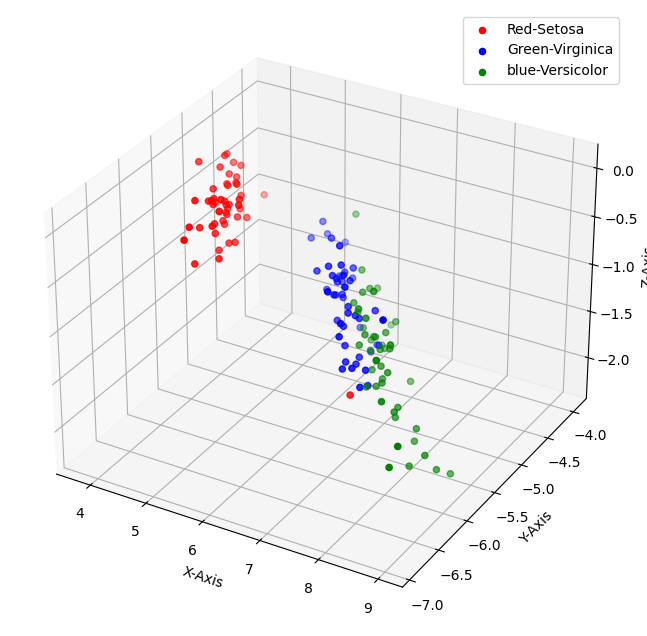

In [ ]:
main_datapoint_matrix = matrix_with_datapoints_casted_to_3_dimensions

#pertaining to setosa species
x1 = np.array(main_datapoint_matrix[:51,0])
y1= np.array(main_datapoint_matrix[:51,1])
z1 = np.array(main_datapoint_matrix[:51,2])

#pertaining to Virginca species
x2 = np.array(main_datapoint_matrix[51:101,0])
y2= np.array(main_datapoint_matrix[51:101,1])
z2 = np.array(main_datapoint_matrix[51:101,2])

#pertaining to Versicolor species
x3 = np.array(main_datapoint_matrix[101:151,0])
y3 = np.array(main_datapoint_matrix[101:151,1])
z3 = np.array(main_datapoint_matrix[101:151,2])


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x1,y1,z1,c='r')
ax.scatter(x2,y2,z2,c='b')
ax.scatter(x3,y3,z3,c='g')

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.legend(['Red-Setosa', 'Green-Virginica', 'blue-Versicolor'],loc='upper right')